<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/GCAF/EarthAnlytcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 2. Customize Map Legends and Colors in Python using Matplotlib: GIS in Python

In [ ]:
#https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/

In [ ]:


!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 43.1 MB/s eta 0:00:00


In [ ]:


#https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/

#Import libraries

import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd
import earthpy as et

# Get the data & set working dir
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

#https://ndownloader.figshare.com/files/12459464
sjer_roads = gpd.read_file('https://ndownloader.figshare.com/files/12459464')

# View data type
print(type(sjer_roads['RTTYP']))

#View unique attributes for each road in the data
print(sjer_roads['RTTYP'].unique())

#Map each value to a new value
sjer_roads['RTTYP'].replace(np.nan, 'Unknown', inplace=True)

print(sjer_roads['RTTYP'].unique())

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


ERROR:fiona._env:`/vsicurl/https://ndownloader.figshare.com/files/12459464' not recognized as a supported file format.


DriverError: ignored

NameError: ignored

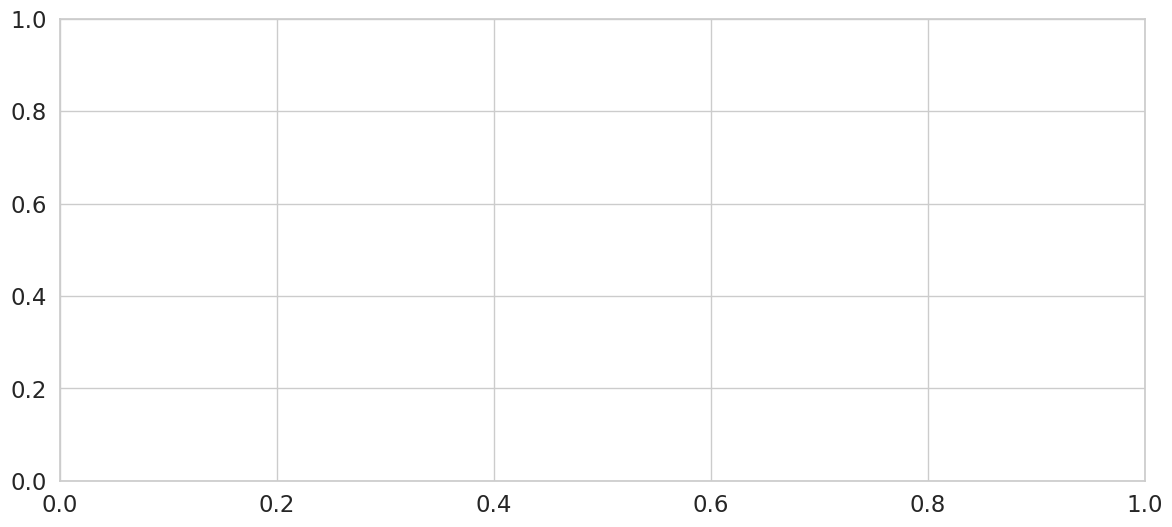

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))

sjer_roads.plot(column='RTTYP',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

ax.set_axis_off()

plt.show()

#Lesson 1. Activity: Practice Plotting Tabular Data Using Matplotlib and Pandas in Open Source Python

In [ ]:


# Import Packages
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import earthpy as et
import matplotlib.axes
import time

# Add seaborn general plot specifications
sns.set(font_scale=1.5, style="whitegrid")

In [ ]:



#URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file from URL
# NOTE - this csv file should download to your home directory: `~/earth-analytics/earthpy-downloads`
et.data.get_data(url=avg_monthly_precip_url)

# Set your working directory
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))

In [ ]:
#precip_data.hist(precip_data.months, precip_data.precip, bins = 12)

In [ ]:

precip_path = os.path.join("earthpy-downloads",
                           "avg-precip-months-seasons.csv")

precip_data = pd.read_csv(precip_path)

#from google.colab import drive
#drive.mount('/content/drive')

precip_data.to_csv('/content/drive/MyDrive/Colab Notebooks/precip_dataavg-precip-months-seasons.csv')
#precip_data.to_csv("../drive/My Drive/Colab Notebooks/precip_dataavg-precip-months-seasons.csv")
precip_data

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


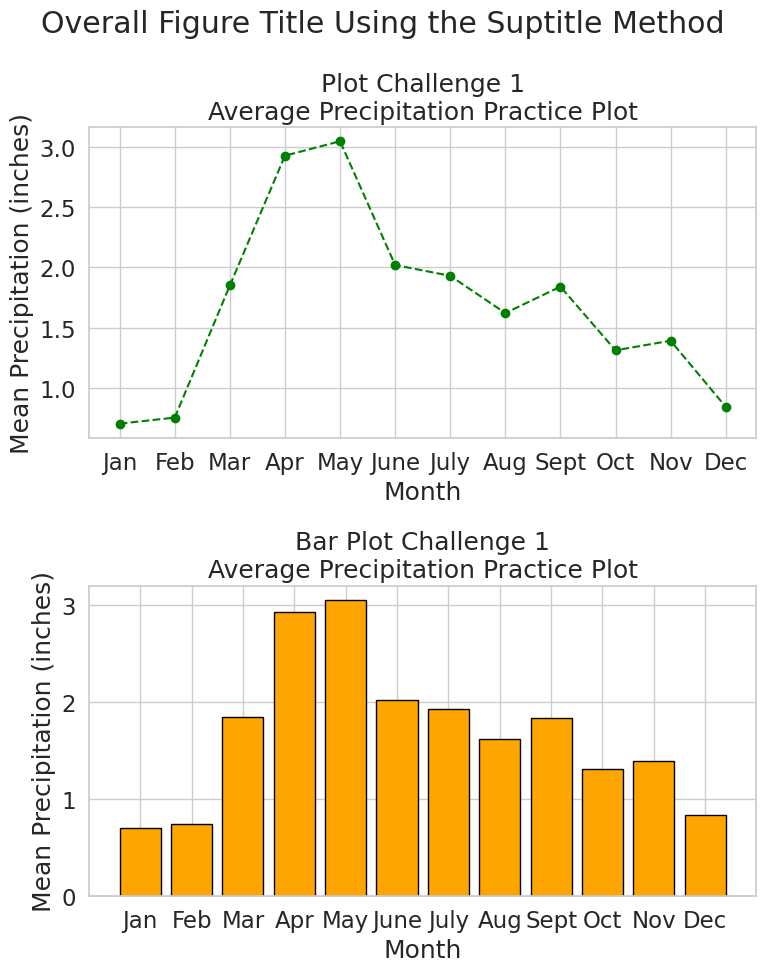

In [ ]:


# Plot the data
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 10))
plt.suptitle("Overall Figure Title Using the Suptitle Method")

ax1.plot(precip_data.months,
        precip_data.precip,
        color="Green",
        linestyle='dashed', marker="o")

ax1.set(ylabel="Mean Precipitation (inches)",
       xlabel="Month",
       title="Plot Challenge 1\nAverage Precipitation Practice Plot")

ax2.bar(precip_data.months,
       precip_data.precip,
       color="orange",
       edgecolor="black")

ax2.set(ylabel="Mean Precipitation (inches)",
       xlabel="Month",
       title="Bar Plot Challenge 1\nAverage Precipitation Practice Plot")

plt.tight_layout()
plt.show()

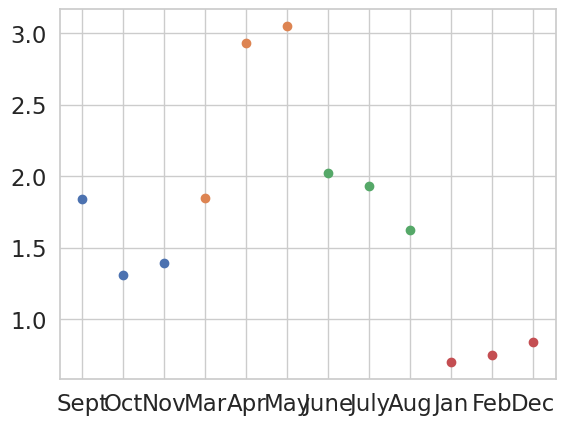

In [ ]:

for label, df in precip_data.groupby("seasons"):
    plt.plot(df.months,
            df.precip,
            "o",
            # The label is the season or the group by object in this case
            label=label)

In [ ]:

colors = {"Winter": "lightgrey",
                 "Spring": "green",
                 "Summer": "darkgreen",
                 "Fall": "brown"}

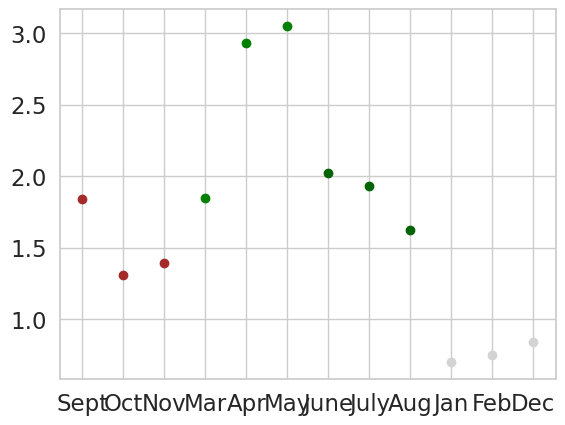

In [ ]:

for label, df in precip_data.groupby("seasons"):
    plt.plot(df.months,
            df.precip,
            "o",
            # The label is the season or the group by object in this case
            label=label,
            color=colors[label])

In [ ]:


# Print each label object which is the group by category - season
for label, df in precip_data.groupby("seasons"):
    print(label)

Fall
Spring
Summer
Winter


In [ ]:

# Print each grouped data
for label, df in precip_data.groupby("seasons"):
    print(df)

   months  precip seasons
8    Sept    1.84    Fall
9     Oct    1.31    Fall
10    Nov    1.39    Fall
  months  precip seasons
2    Mar    1.85  Spring
3    Apr    2.93  Spring
4    May    3.05  Spring
  months  precip seasons
5   June    2.02  Summer
6   July    1.93  Summer
7    Aug    1.62  Summer
   months  precip seasons
0     Jan    0.70  Winter
1     Feb    0.75  Winter
11    Dec    0.84  Winter


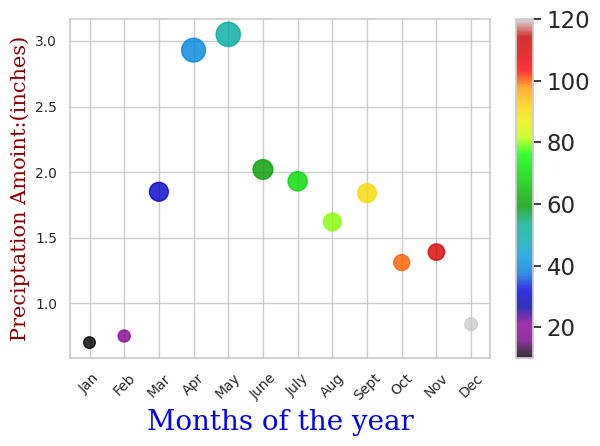

In [ ]:

font1 = {'family':'serif','color':'blue','size':20}
font2= {'family':'serif','color':'darkred','size':15}

S = 100*precip_data.precip
#S=  100*precip_data['precip'] both these work
plt.scatter(precip_data['months'], precip_data['precip'], S, c=[10,20,30,40,50,60,70,80,90,100,110,120], cmap='nipy_spectral', alpha= 0.8)

plt.xlabel('Months of the year', fontdict = font1)
plt.ylabel('Preciptation Amoint:(inches)', fontdict = font2)

plt.colorbar()

#https://www.google.com/amp/s/www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/amp/
plt.xticks(size=10, rotation= 45)
plt.yticks(size=10, rotation=0)

plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:


B=precip_data.groupby('seasons').sum()
B

<ipython-input-19-b7586103352b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  B=precip_data.groupby('seasons').sum()


,precip
seasons,
Fall,4.54
Spring,7.83
Summer,5.57
Winter,2.29


In [ ]:

C={ "Fall":4.54,"Spring":7.83,"Summer":5.57,"Winter": 2.29}
A= pd.DataFrame(C, index=[0])
A
C.values()

dict_values([4.54, 7.83, 5.57, 2.29])

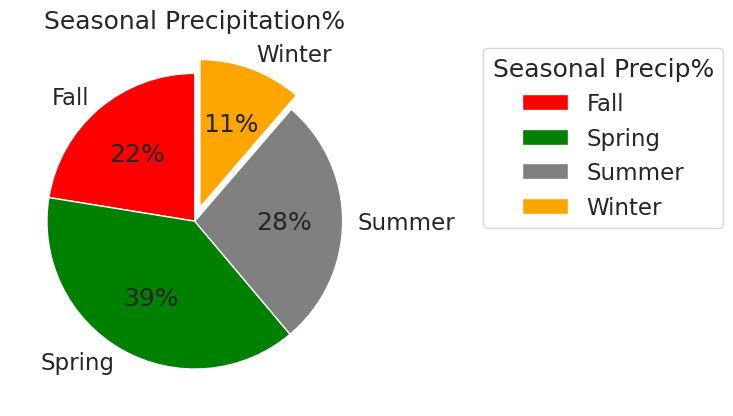

<Figure size 1500x800 with 0 Axes>

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [ ]:


palette_color = sns.color_palette('dark')
# ["Fall","Spring","Summer","Winter"]

#plt.figure(figsize=(10,8))

plt.pie(C.values(), labels=C.keys(), colors=['Red', 'Green', 'Grey', 'Orange'], explode=[0,0,0,0.1], startangle=90, autopct='%.0f%%')
plt.legend(loc='best', title='Seasonal Precip%', bbox_to_anchor=(1.25,1))
plt.title('Seasonal Precipitation%')
plt.figure(figsize=(15,8))
plt.show()
palette_color

<Axes: ylabel='Density'>

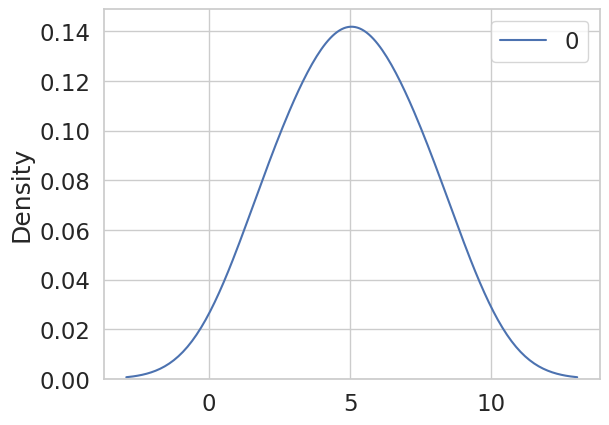

In [ ]:

sns.kdeplot(C.values())

Total time taken by the process of plotting is : 0.04128575325012207 seconds


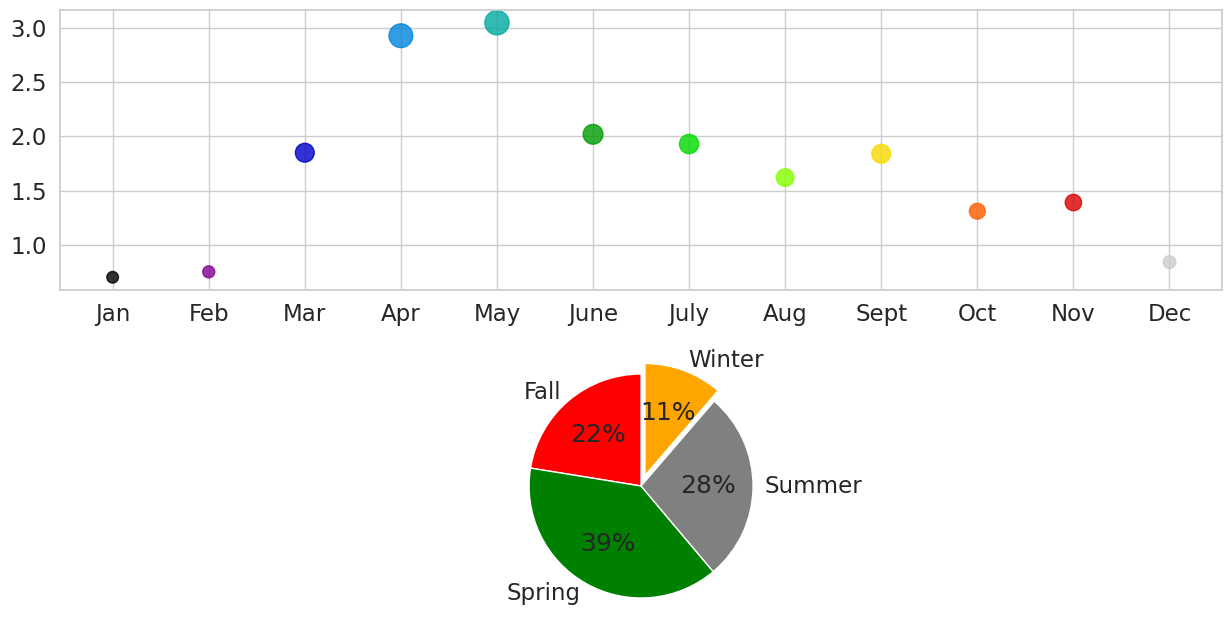

In [ ]:


fig, (ax1,ax2)= plt.subplots(2,1, figsize=(15,8))

start=time.time()
ax1.scatter(precip_data['months'], precip_data['precip'], S, c=[10,20,30,40,50,60,70,80,90,100,110,120], cmap='nipy_spectral', alpha= 0.8)
ax2.pie(C.values(), labels=C.keys(), colors=['Red', 'Green', 'Grey', 'Orange'], explode=[0,0,0,0.1], startangle=90, autopct='%.0f%%')
End=time.time()
Total_time_taken= End-start
print("Total time taken by the process of plotting is :",Total_time_taken,"seconds")
plt.show()

In [ ]:
precip_data[['precip','months']].value_counts()

precip  months
0.70    Jan       1
0.75    Feb       1
0.84    Dec       1
1.31    Oct       1
1.39    Nov       1
1.62    Aug       1
1.84    Sept      1
1.85    Mar       1
1.93    July      1
2.02    June      1
2.93    Apr       1
3.05    May       1
dtype: int64